In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
%run ../common/SKL_GPR.py
%run ../common/homemade_BO.py
np.random.seed(seed=123)

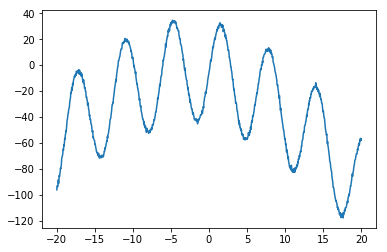

In [2]:
#Define data, supervised data
def x2y(x):
    f = 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
    return f
#
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx)
y = list(map(x2y,x)) #for python3
y = np.array(y)
plt.plot(x, y) #### plot true data
plt.show()

In [3]:
#Define GPR and Bayesian opt.
Noptimize = 100
#kernel = kernels.ConstantKernel() + kernels.ConstantKernel()*kernels.RBF()
kernel = kernels.RBF()
#kernel = kernels.ConstantKernel() + kernels.ConstantKernel()*kernels.Matern(nu=0.5)
#kernel = kernels.Matern(nu=0.5)
GPR = Gaussian_Process_Regression(kernel=kernel, alpha=1e-8, normalize_y=True, optimizer='fmin_l_bfgs_b', \
                                   copy_X_train=True, n_restarts_optimizer=Noptimize, random_state=123)
#
BO = Bayesian_opt()
BO.acqui_name = 'EI'
#BO.acqui_name = 'PI'
#BO.acqui_name = 'UCB'
print('# The choice of acquisition function: ',BO.acqui_name)

# The choice of acquisition function:  EI


epoch =  0 , x_point, maxval = -20.0,  10.752429826046175
epoch =  1 , x_point, maxval = 5.025025025025023,  10.752429826046175
epoch =  2 , x_point, maxval = -7.5875875875875884,  10.752429826046175
epoch =  3 , x_point, maxval = 20.0,  10.752429826046175
epoch =  4 , x_point, maxval = -12.952952952952952,  10.752429826046175
epoch =  5 , x_point, maxval = -2.2622622622622615,  10.752429826046175
epoch =  6 , x_point, maxval = 15.675675675675677,  10.752429826046175
epoch =  7 , x_point, maxval = -16.036036036036037,  10.752429826046175
epoch =  8 , x_point, maxval = -4.744744744744745,  33.8335070553885
epoch =  9 , x_point, maxval = -4.384384384384385,  33.8335070553885
epoch =  10 , x_point, maxval = -4.664664664664665,  34.01713377558175


/home/shinohara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.10194837e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/shinohara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.29699291e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


epoch =  11 , x_point, maxval = 1.701701701701701,  34.01713377558175


/home/shinohara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.10583134e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


epoch =  12 , x_point, maxval = 17.83783783783784,  34.01713377558175
epoch =  13 , x_point, maxval = 13.273273273273276,  34.01713377558175


/home/shinohara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.89488483e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


epoch =  14 , x_point, maxval = 1.1811811811811808,  34.01713377558175


/home/shinohara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00043926]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/shinohara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-4.36285118e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 71, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


epoch =  15 , x_point, maxval = -17.7977977977978,  34.01713377558175


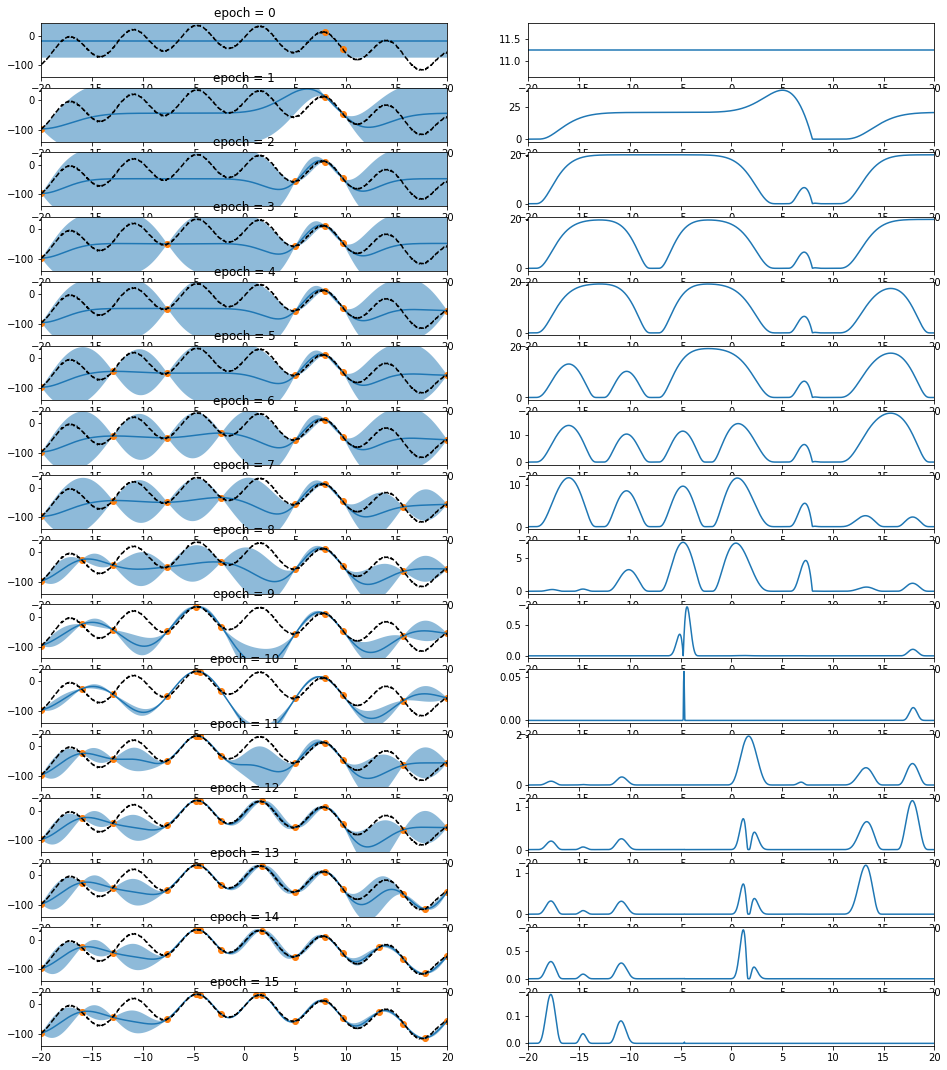

# Actual value of maximum is [34.65978763]
# Got value in the Bayesian_opt is 34.01713377558175
# Optimization is finished.


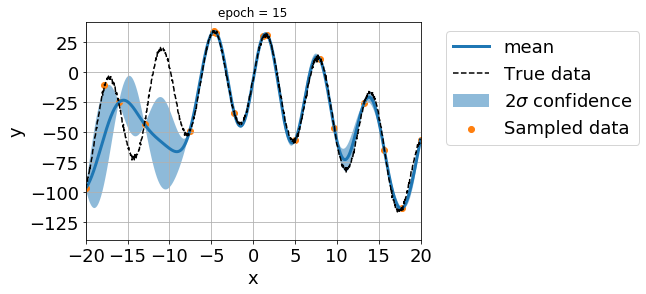

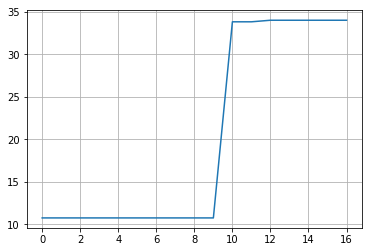

In [4]:
#Definition of array as the initial condition
x_sample_init = np.array([])
y_sample_init = np.array([])
Ninitial = 2
for i in range(Ninitial):
    x_point = np.random.uniform(xmin,xmax) #Initial point is randomely chosen
    x_sample_init = np.append(x_sample_init,x_point) 
    y_point = x2y(x_point) 
    y_sample_init = np.append(y_sample_init,y_point) 
#
Nepoch = 16 #Number of optimization
nplotevery = Nepoch//16 #Plot the results in every this number

mean, std, x_point, y_point, maxval_list = DO_BO(GPR, BO, x2y, x, x_sample_init, y_sample_init, Nepoch, nplotevery, answer_is_there=True)

plt.figure()
plt.plot(maxval_list)
plt.grid()
plt.show()